
Getting data - Setup Data - Training and Test

In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# y = pd.DataFrame(np.where(y[:]==0, 1, 0))
for i in y:
    if i==1:
        i=0
    else:
        i=1
        


X.head()        # to get a feeling of data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y.shape       #Data targets

(569,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

adding a column of 1 to training and test data

In [13]:
X_train.insert(0, "Dummy", np.ones(X_train.shape[0]))
X_test.insert(0, "Dummy", np.ones(X_test.shape[0]))


features_size = X_train.shape[1]  # Extracting the number of features




In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy(y_train)
y_test = y_test.to_numpy(y_test)


Sigmoid Function

In [15]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Training using Logistic Regression

In [16]:


w = np.zeros(features_size)
learning_rate = 0.01
N = X_train.shape[0]
delta_E = 20*np.ones(features_size)
threshold = 20
theta = 0.5
num_of_iterations = 5
counter = 0
while counter <= num_of_iterations:
    
    predicted_class = []
    delta_E = 0
    for i in range(N):
        delta_E += -1/N * (y_train[i]*X_train[i][:].T) / (1+np.exp(y_train[i]*w.T@X_train[i][:].T))
        
    w = w - learning_rate * delta_E

    Error_zero_one = 0
    for i in range(N):
        predicted_class.append(1 if sigmoid(w.T@X_train[i][:].T) >= theta else 0)
        if y_train[i] != predicted_class[i]:
            Error_zero_one += 1
    counter += 1

Generalization_Err = 0
for i in range(N):
    if y_train[i] != predicted_class[i]:
        Generalization_Err += 1

print(Generalization_Err/y_train.shape[0]*100)
    




8.398950131233596


In [17]:
def confusion_matrix(predict, y_test):
    TP, FP, TN, FN = 0, 0, 0, 0
    for y,t in zip(predict,y_test):
        if y == 1 and t == 1:
            TP += 1
        if y == 1 and t == 0:
            FP += 1
        if y == 0 and t == 0:
            TN += 1
        if y == 0 and t == 1:
            FN += 1
        
        FPR = 0 if (FP + TN) == 0 else FP / (FP + TN)     # Fase positive rate
        TPR = 0 if (TP + FN) == 0 else TP / (TP + FN)       # True Positive Rate
        specificity = 0 if (TN + FP) == 0 else TN / (TN + FP)
        miss_classification = (FP+FN)/(TP+TN+FP+FN)
        recall = 0 if (TP+FN) == 0 else TP/(TP+FN)
        precision = 0 if (TP+FP) == 0 else TP/(TP+FP)
        F1 = 0 if (recall+precision) == 0 else 2*(recall*precision)/(recall+precision)
    return miss_classification, TPR, FPR, F1, specificity, TP, TN, FP, FN


ROC

60


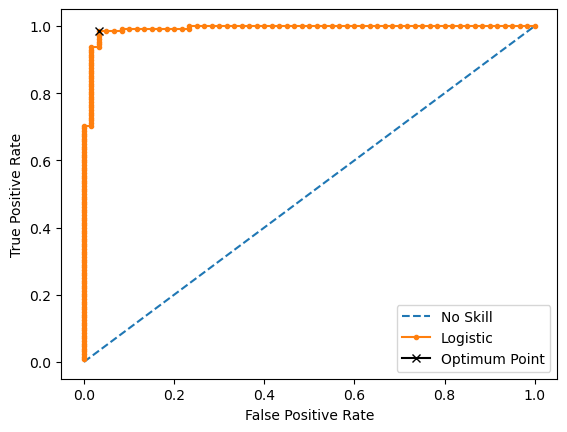

Missclassification rate for built-in LR:2.127659574468085%


In [44]:
theta = np.linspace(0,1,150)

miss_classification_rate_all_coded = []

theta = X_test@w
theta = sigmoid(theta)
theta = np.sort(theta)
TPR_coded = []
specifity_coded = []
FPR_coded = []
N = X_test.shape[0]

for theta_i in theta:
    predicted_class = []
    for i in range(N):
        
        predicted_class.append(1 if sigmoid(w@X_test[i][:]) >= theta_i else 0)
        
    miss_classification_rate, TPR, FPR, F1, specificity, TP, TN, FP, FN = confusion_matrix(predicted_class, y_test)
    
    miss_classification_rate_all_coded.append(miss_classification_rate)
    specifity_coded.append(specificity)
    TPR_coded.append(TPR)
    FPR_coded.append(FPR)

min_missclass = miss_classification_rate_all_coded.index(min(miss_classification_rate_all_coded))
print(min_missclass)
# plt.plot(FPR_SCI, TPR_SCI)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(FPR_coded, TPR_coded, marker='.', label='Logistic')
plt.plot(FPR_coded[min_missclass], TPR_coded[min_missclass], 'k-x', label='Optimum Point')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

print("Missclassification rate for built-in LR:" + str(min(miss_classification_rate_all_coded)*100)+"%")

Logistic Regression with Sci-kit

0


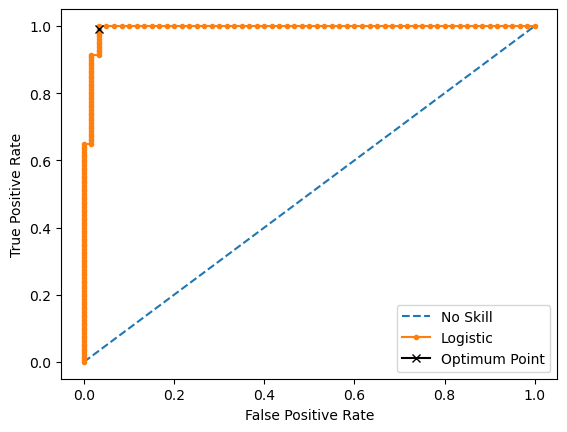

Missclassification rate for built-in LR:1.5957446808510638%


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve


clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
yhat = clf.predict_proba(X_test)
yhat = yhat[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat,drop_intermediate=False)

w_lf = clf.coef_
w.shape


TPR_SCI = []
specifity_SCI = []
FPR_SCI = []
miss_classification_rate_all_SCI = []

# theta = np.linspace(-20,40,1000)
# theta_l = 1/(1+np.exp(-theta))
for THRESHOLD in theta:

    preds = np.where(yhat > THRESHOLD, 1, 0)
    
    miss_classification_rate, TPR, FPR, F1, specificity, TP, TN, FP, FN = confusion_matrix(preds, y_test)
    
    miss_classification_rate_all_SCI.append(miss_classification_rate)
    specifity_SCI.append(specificity)
    TPR_SCI.append(TPR)
    FPR_SCI.append(FPR)

min_missclass = miss_classification_rate_all_SCI.index(min(miss_classification_rate_all_SCI))
print(min_missclass)


# plt.plot(FPR_SCI, TPR_SCI)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(FPR_SCI[min_missclass], TPR_SCI[min_missclass], 'k-x', label='Optimum Point')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

print("Missclassification rate for built-in LR:" + str(min(miss_classification_rate_all_SCI)*100)+"%")

KNN implementation - Cross Validation


In [52]:

def knn(train_X, train_y, test_X, k):
    num_test = test_X.shape[0]
    num_train = train_X.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        for j in range(num_train):
            dists[i,j] = np.sqrt(np.sum((test_X[i,:] - train_X[j,:])**2))
    closest_y = train_y[np.argsort(dists, axis=1)[:, :k]]
    y_pred = np.empty(num_test, dtype=train_y.dtype)
    for i, row in enumerate(closest_y):
        counts = np.bincount(row, minlength=np.max(train_y)+1)
        max_count = np.max(counts)
        if np.count_nonzero(counts == max_count) == 1:
            y_pred[i] = np.argmax(counts)
        else:
            indices = np.flatnonzero(counts == max_count)
            y_pred[i] = np.random.choice(indices)
    return y_pred

def cross_validation(X, y, num_folds, k_choices):
    X_folds = np.array_split(X, num_folds)
    y_folds = np.array_split(y, num_folds)
    k_to_accuracies = {}
    for k in k_choices:
        accuracies = []
        for i in range(num_folds):
            X_train = np.concatenate(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            X_test = X_folds[i]
            y_test = y_folds[i]
            y_pred = knn(X_train, y_train, X_test, k)
            num_correct = np.sum(y_pred == y_test)
            accuracy = float(num_correct) / y_test.shape[0]
            accuracies.append(accuracy)
        k_to_accuracies[k] = accuracies
    return k_to_accuracies

k_choices = [1, 3, 5, 7, 9]
num_folds = 5
k_to_accuracies = cross_validation(X_train, y_train, num_folds, k_choices)


for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))
    print('mean accuracy for k = %d: %f' % (k, np.mean(k_to_accuracies[k])))

print("\n**** ---> We chose k=3 since it has the highest accuaracy!")

k = 1, accuracy = 0.948052
k = 1, accuracy = 0.947368
k = 1, accuracy = 0.894737
k = 1, accuracy = 0.960526
k = 1, accuracy = 0.934211
mean accuracy for k = 1: 0.936979
k = 3, accuracy = 0.961039
k = 3, accuracy = 0.986842
k = 3, accuracy = 0.907895
k = 3, accuracy = 0.986842
k = 3, accuracy = 0.947368
mean accuracy for k = 3: 0.957997
k = 5, accuracy = 0.961039
k = 5, accuracy = 0.986842
k = 5, accuracy = 0.907895
k = 5, accuracy = 0.973684
k = 5, accuracy = 0.947368
mean accuracy for k = 5: 0.955366
k = 7, accuracy = 0.961039
k = 7, accuracy = 0.986842
k = 7, accuracy = 0.907895
k = 7, accuracy = 0.973684
k = 7, accuracy = 0.934211
mean accuracy for k = 7: 0.952734
k = 9, accuracy = 0.961039
k = 9, accuracy = 0.986842
k = 9, accuracy = 0.921053
k = 9, accuracy = 0.973684
k = 9, accuracy = 0.934211
mean accuracy for k = 9: 0.955366

**** ---> We chose k=3 since it has the highest accuaracy!


Training KNN with k = 3

In [55]:
y_pred = knn(X_train, y_train, X_test, 3)
miss_classification_rate, TPR, FPR, F1, specificity, TP, TN, FP, FN = confusion_matrix(y_pred, y_test)
print("Using 3NN classifier, missclassification rate is: " + str(miss_classification_rate*100) + "%")

Using 3NN classifier, missclassification rate is: 3.1914893617021276%


KNN implementation using scikit - cross validation

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# create a KNN classifier object
knn = KNeighborsClassifier()

# define a range of k values to try
k_range = [1, 3, 5, 7, 9]

# perform 5-fold cross-validation for each k value in the range
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# find the best k value based on cross-validation score
best_k = k_range[np.argmax(k_scores)]

# train the model with the best k value on the full training set
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# evaluate the model on the test set
pred = knn_best.predict(X_test)

miss_classification_rate, TPR, FPR, F1, specificity, TP, TN, FP, FN = confusion_matrix(pred, y_test)
print("Using 3NN classifier, missclassification rate is: " + str(miss_classification_rate*100) + "%")

Using 3NN classifier, missclassification rate is: 2.6595744680851063%
